# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import random
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [3]:
# Make lists to store information for each city
city_list = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temperature = []
wind_speed = []

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#testing base url and units and combine them to get a test query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
city = "San Antonio"

#build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

response = requests.get(query_url + city).json()

pprint(response)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 29.4241, 'lon': -98.4936},
 'dt': 1651970795,
 'id': 4726206,
 'main': {'feels_like': 96.22,
          'humidity': 35,
          'pressure': 1003,
          'temp': 94.84,
          'temp_max': 98.71,
          'temp_min': 91.04},
 'name': 'San Antonio',
 'sys': {'country': 'US',
         'id': 5857,
         'sunrise': 1651924023,
         'sunset': 1651972438,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 130, 'speed': 14.97}}


In [5]:
#base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

print("Beginning Data Retrieval")
print("-----------------------------")


# Create a loop to read through all of the cities
i = 1
for city in cities:
    
    response = requests.get(query_url + city).json()
        
    try:
        city_list.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temperature.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        print(f"Processing Record {i} : {city}") 
        i+=1
  
    except(KeyError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 : arlit
Processing Record 2 : progreso
Processing Record 3 : ushuaia
Processing Record 4 : areosa
Processing Record 5 : vestmannaeyjar
Processing Record 6 : hofn
Processing Record 7 : jamestown
Processing Record 8 : tiksi
Processing Record 9 : zhangjiakou
Processing Record 10 : ancud
Processing Record 11 : castro
Processing Record 12 : bluff
Processing Record 13 : puerto del rosario
Processing Record 14 : puerto ayora
Processing Record 15 : nanortalik
Processing Record 16 : loa janan
Processing Record 17 : basco
Processing Record 18 : port alfred
Processing Record 19 : kez
Processing Record 20 : padang
Processing Record 21 : rikitea
Processing Record 22 : neftegorsk
Processing Record 23 : albany
Processing Record 24 : moose factory
Processing Record 25 : palmer
Processing Record 26 : sao joao da barra
Processing Record 27 : ilulissat
Processing Record 28 : presidencia roque saenz pena
Processing Record 29 : anad

Processing Record 235 : buala
City not found. Skipping...
Processing Record 236 : ambilobe
Processing Record 237 : ostrovnoy
Processing Record 238 : port macquarie
Processing Record 239 : arman
Processing Record 240 : provideniya
Processing Record 241 : salalah
City not found. Skipping...
Processing Record 242 : vao
Processing Record 243 : airai
Processing Record 244 : port moresby
Processing Record 245 : kidal
Processing Record 246 : magaria
Processing Record 247 : codrington
Processing Record 248 : walvis bay
Processing Record 249 : san quintin
Processing Record 250 : wajid
Processing Record 251 : rawson
Processing Record 252 : sola
Processing Record 253 : marrakesh
Processing Record 254 : kruisfontein
Processing Record 255 : fairbanks
Processing Record 256 : swellendam
Processing Record 257 : aklavik
Processing Record 258 : mayo
Processing Record 259 : mende
Processing Record 260 : tripoli
Processing Record 261 : lakes entrance
Processing Record 262 : minden
Processing Record 263 : 

Processing Record 462 : asyut
Processing Record 463 : wellsford
City not found. Skipping...
Processing Record 464 : qasigiannguit
Processing Record 465 : aljustrel
Processing Record 466 : terney
Processing Record 467 : baruun-urt
Processing Record 468 : yeniseysk
Processing Record 469 : amboise
Processing Record 470 : riverton
Processing Record 471 : kalakamati
Processing Record 472 : ponta delgada
Processing Record 473 : linqiong
Processing Record 474 : kandalaksha
Processing Record 475 : candolim
Processing Record 476 : northam
Processing Record 477 : belaya gora
Processing Record 478 : senador jose porfirio
Processing Record 479 : khyriv
Processing Record 480 : valle de allende
Processing Record 481 : chicama
City not found. Skipping...
Processing Record 482 : tual
Processing Record 483 : alekseyevka
Processing Record 484 : cleveland
Processing Record 485 : chumikan
Processing Record 486 : vestmanna
Processing Record 487 : shilka
Processing Record 488 : tignere
Processing Record 489

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
df = pd.DataFrame({ 
                "City" : city_list,
                "Cloudiness" : cloudiness,
                "Country" : country,
                "Date" : date,
                "Humidity" : humidity,
                "Latitude" : latitude,
                "Longitude" : longitude,
                "Max Temp" : max_temperature,
                "Wind Speed" : wind_speed 
                })
df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Arlit,77,NE,1651970830,14,18.7369,7.3853,88.21,11.95
1,Progreso,0,MX,1651970830,85,21.2833,-89.6667,84.11,10.49
2,Ushuaia,20,AR,1651970638,49,-54.8000,-68.3000,47.86,16.11
3,Areosa,100,PT,1651970831,73,41.7178,-8.8571,59.70,3.94
4,Vestmannaeyjar,100,IS,1651970831,90,63.4427,-20.2734,45.79,24.23
...,...,...,...,...,...,...,...,...,...
566,Inongo,100,CD,1651971068,94,-1.9500,18.2667,71.83,2.06
567,Rāvar,66,IR,1651971069,38,31.2656,56.8055,71.89,6.55
568,Saint-Pie,4,CA,1651971070,26,45.5001,-72.8991,56.12,8.05
569,Luxeuil-les-Bains,0,FR,1651971070,87,47.8171,6.3650,46.02,1.14


In [7]:
df.to_csv("cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
df["Humidity"].max()

100

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

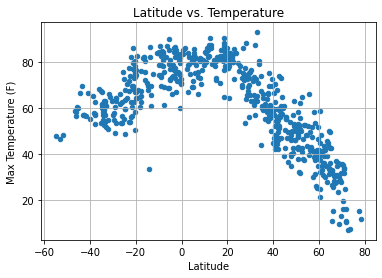

In [11]:
#creating scatter plot
df.plot(kind="scatter", x="Latitude", y="Max Temp", grid=True, title="Latitude vs. Temperature")

#labeling the axis
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#saving image to file
plt.savefig("Latitude_vs_Temperature_plot.png")

#displaying chart
plt.show()

The above plot is analyzing the daily max temperature of 571 cites at differnt latiudes around the world.

## Latitude vs. Humidity Plot

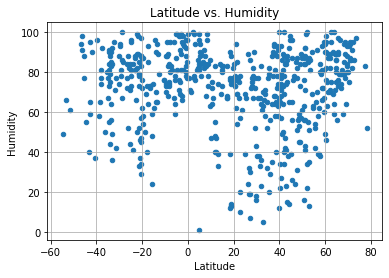

In [12]:
#creating scatter plot
df.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, title="Latitude vs. Humidity")

#labeling the axis
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#saving image to file
plt.savefig("Latitude_vs_Humidity_plot.png")

#displaying chart
plt.show()

Similar to the last plot we are looking at the humidity levels of 571 cities. What we can see is that there are a majority of tested cities with very high humidity levels. Of those with lower humidity levels, more fall in the nothern hemisphere. I will say that I don't think any Sourthern Texas cities were in that small selection. 

## Latitude vs. Cloudiness Plot

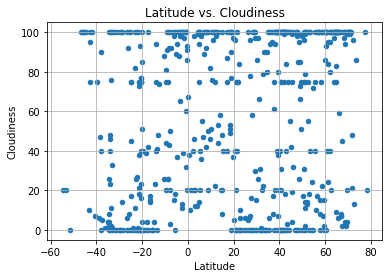

In [13]:
#creating scatter plot
df.plot(kind="scatter", x="Latitude", y="Cloudiness", grid=True, title="Latitude vs. Cloudiness")

#labeling the axis
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#saving image to file
plt.savefig("Latitude_vs_Cloudiness_plot.png")

#displaying chart
plt.show()

I found this above chart to be interesting. I wounder how cloudiness is measured. However it appears that for the 571 cites analyzed, most cites are either at 100 cloudiness or 0 cloudiness. All or nothing. 

## Latitude vs. Wind Speed Plot

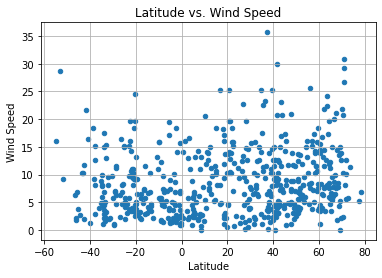

In [14]:
#creating scatter plot
df.plot(kind="scatter", x="Latitude", y="Wind Speed", grid=True, title="Latitude vs. Wind Speed")

#labeling the axis
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#saving image to file
plt.savefig("Latitude_vs_Wind_Speed_plot.png")

#displaying chart
plt.show()

In [ ]:
This last worldly plot graphs windspeeds to latitude. Interestingly, at the time of the data being pulled, the northen cities has more higher wind speeds. 

## Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = df.loc[df["Latitude"] >=0]
southern_hemisphere = df.loc[df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8986565680800609


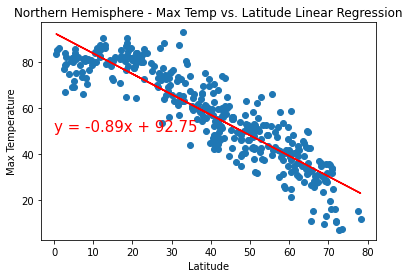

In [16]:
#establishing x and y values
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Max Temp"]

#creating linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
linear_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#creating scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.annotate(linear_equation, (0,50), fontsize=15, color="red")

#creating labels
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

print(f"The r-value is: {rvalue}")

# saving image to file
plt.savefig("Northern_Hemisphere_Max_Temp_vs_Latitude_Regression.png")

#displaying chart
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.680515055828379


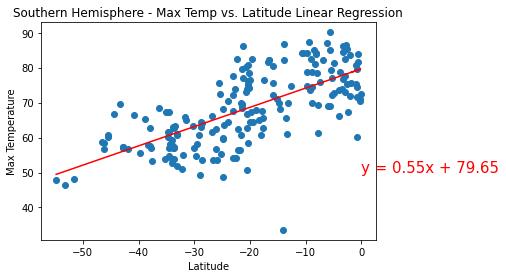

In [17]:
#establishing x and y values
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Max Temp"]

#creating linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
linear_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#creating scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.annotate(linear_equation, (0,50), fontsize=15, color="red")

#creating labels
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

print(f"The r-value is: {rvalue}")

# saving image to file
plt.savefig("Southern_Hemisphere_Max_Temp_vs_Latitude_Regression.png")

#displaying chart
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.12477932147068826


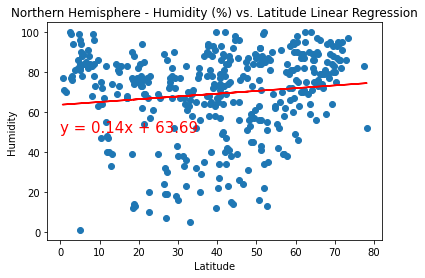

In [18]:
#establishing x and y values
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Humidity"]

#creating linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
linear_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#creating scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.annotate(linear_equation, (0,50), fontsize=15, color="red")

#creating labels
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is: {rvalue}")

# saving image to file
plt.savefig("Northern_Hemisphere_Humidity_vs_Latitude_Regression.png")

#displaying chart
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.20580403377145925


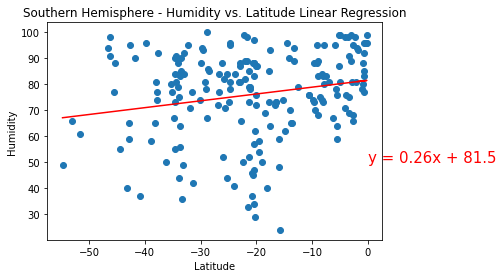

In [19]:
#establishing x and y values
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Humidity"]

#creating linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
linear_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#creating scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.annotate(linear_equation, (0,50), fontsize=15, color="red")

#creating labels
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is: {rvalue}")

# saving image to file
plt.savefig("Southern_Hemisphere_Humidity_vs_Latitude_Regression.png.png")

#displaying chart
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11284186550552198


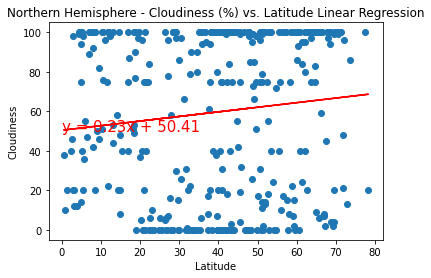

In [20]:
#establishing x and y values
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Cloudiness"]

#creating linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
linear_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#creating scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.annotate(linear_equation, (0,50), fontsize=15, color="red")

#creating labels
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is: {rvalue}")

# saving image to file
plt.savefig("Northern_Hemisphere_Cloudiness_vs_Latitude_Regression.png")

#displaying chart
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21874831202023926


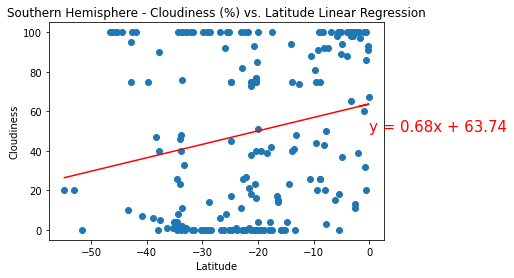

In [21]:
#establishing x and y values
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Cloudiness"]

#creating linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
linear_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#creating scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.annotate(linear_equation, (0,50), fontsize=15, color="red")

#creating labels
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is: {rvalue}")

# saving image to file
plt.savefig("Southern_Hemisphere_Cloudiness_vs_Latitude_Regression.png")

#displaying chart
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.118720129793833


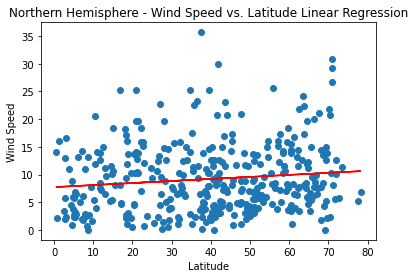

In [22]:
#establishing x and y values
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Wind Speed"]

#creating linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
linear_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#creating scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.annotate(linear_equation, (0,50), fontsize=15, color="red")

#creating labels
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-value is: {rvalue}")

# saving image to file
plt.savefig("Northern_Hemisphere_Wind_Speed_vs_Latitude_Regression.png")

#displaying chart
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1964086734375095


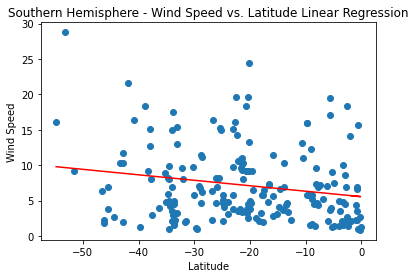

In [23]:
#establishing x and y values
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Wind Speed"]

#creating linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
linear_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#creating scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.annotate(linear_equation, (0,50), fontsize=15, color="red")

#creating labels
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-value is: {rvalue}")

# saving image to file
plt.savefig("Southern_Hemisphere_Wind_Speed_vs_Latitude_Regression.png")

#displaying chart
plt.show()